* Author: Lauren Engel
* Major: Computer Science
* Creation Date: April 25, 2022
* Due Date: May 11, 2022
* Course: CSC 223 010
* Professor Name: Mr. Earl
* Assignment: Final Project
* Filename: main.ipynb
* Purpose: This notebook will analyze data about patients who have and have not had a stroke and determine what is linked to strokes
* Data Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Introduction
`The dataset being analyzed in this project includes information about both patients who have and have not had a stroke. The data includes a variety of attributes about both groups of patients, such as age, their smoking status, and more. By comparing the characteristics of those who had a stroke and those who haven't, this project will determine what causes a person to be at a higher risk of having a stroke.`

In [63]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# Import dataset, separate stroke patients from non-stroke patients
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col = 'id')
non_stroke_data = stroke_data[stroke_data['stroke'] == 0] # Patients who haven't had a stroke
stroke_data = stroke_data[stroke_data['stroke'] == 1] # Patients who have had a stroke

## Visualization of a Quanatitive Variable

`Here, we will look at the ages of people who have had a stroke and display the data in a table and in a histogram.`

1.32      1
14.00     1
32.00     1
38.00     2
39.00     3
42.00     1
43.00     1
45.00     3
46.00     1
47.00     1
48.00     2
49.00     3
50.00     3
51.00     4
52.00     2
53.00     2
54.00     6
55.00     2
56.00     3
57.00    11
58.00     7
59.00     8
60.00     4
61.00     6
63.00     9
64.00     3
65.00     3
66.00     4
67.00     3
68.00     9
69.00     6
70.00     6
71.00     7
72.00     6
73.00     4
74.00     9
75.00     6
76.00    10
77.00     8
78.00    21
79.00    17
80.00    17
81.00    14
82.00     9
Name: age, dtype: int64


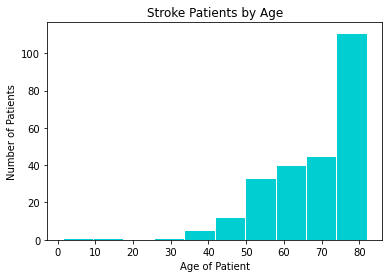

In [65]:
# Quanatitive Variable - Age

# Displays ages of stroke patients and how many of each age
ages = stroke_data['age'].value_counts().sort_index()
print(ages)

fig = plt.figure()
plt.hist(stroke_data['age'], bins = 10, color = 'darkturquoise', edgecolor = 'white')
plt.title('Stroke Patients by Age')
plt.xlabel('Age of Patient')
plt.ylabel('Number of Patients');

### Quanatitive Summary
`We can see that the majority of patients who have had a stroke were between about 70 to 80 years old, with the risk of having a stroke increasing beginning around age 45 to 50. There is a sharp increase of having a stroke starting around the age of 75. We can also see that age doesn't always mean a person will or will not have a stroke, as there are a few younger people - some people in their 30s, a teenager, and even a 1 year old - who have had one as well.`

## Visualization of Categorical Variables
`Here, we will see if a patient having hypertension (high blood pressure) or heart disease increases their risk for having a stroke.`

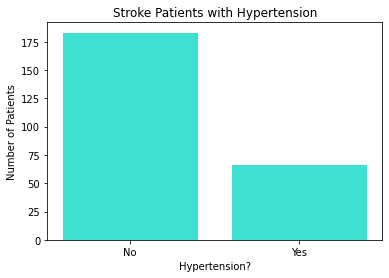

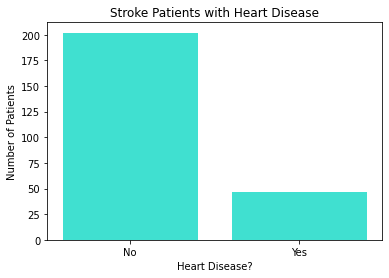

In [66]:
# Categorical Data - Hypertension

fig2 = plt.figure()
hypertension = stroke_data['hypertension'].value_counts()
plt.bar(hypertension.index, hypertension.values, color = 'turquoise')
plt.title('Stroke Patients with Hypertension')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Hypertension?')
plt.ylabel('Number of Patients')

# Categorical Data - Heart Disease

fig3 = plt.figure()
heart_disease = stroke_data['heart_disease'].value_counts()
plt.bar(heart_disease.index, heart_disease.values, color = 'turquoise')
plt.title('Stroke Patients with Heart Disease')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Heart Disease?')
plt.ylabel('Number of Patients');

### Categorical Summary
`The graphs show that hypertension and heart disease have little effect on increasing the risk of a stroke, as there are more stroke patients who haven't had hypertension or heart disease than those who have. However, since there are more stroke patients with hypertension then with heart disease, we can infer that hypertension puts a person at a higher risk for having a stroke than heart disease.`

## Grouping Data
`Here, we will compute the average age of stroke patients for each smoking status (formerly smoked, currently smokes, and never smoked) and see if smoking is linked to having a stroke earlier in life.`

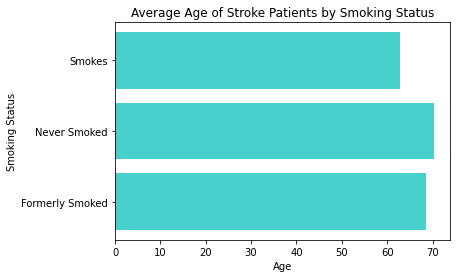

In [67]:
# Grouping Data - Smoking Status/Average Age

stroke_smoking = stroke_data[['age', 'smoking_status']] # Create new DataFrame with just ages and smoking statuses

# Remove patients with unknown smoking status from data
# Used this resource: https://www.geeksforgeeks.org/how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
unknowns = stroke_smoking[stroke_smoking['smoking_status'] == 'Unknown' ].index
stroke_smoking.drop(unknowns, inplace = True)

stroke_smoking = stroke_smoking.groupby(['smoking_status']).mean() # Get average age for each smoking status

fig4 = plt.figure()
plt.barh(stroke_smoking.index, stroke_smoking['age'], color = 'mediumturquoise')
plt.title('Average Age of Stroke Patients by Smoking Status')
plt.yticks(['smokes', 'never smoked', 'formerly smoked'], ['Smokes', 'Never Smoked', 'Formerly Smoked'])
plt.xlabel('Age')
plt.ylabel('Smoking Status');

### Grouping Summary
`We can see that smoking is linked to having a stroke at an younger age, since the average age of stroke patients who currently smoke - around 63 years old - is lower than the average age of those who formerly or never smoked. In addition, a person's chance of getting a stroke earlier in life increases even if they have stopped smoking, as the average age for a stroke patient who quit smoking is lower than the average age of those who never smoked. However, since the average age for a stroke patient who formerly smoked is closer to that of a patient who never smoked, quitting smoking can still greatly decrease a person's chance of having a stroke.`

## Joining Data
`Here, we will compare the average glucose level per age for both groups (patients who have had a stroke and those who haven't) and see if glucose levels have an effect on whether a person has a stroke.`

In [68]:
# Joining Data - Average Glucose Levels

# Create DataFrame with average glucose levels of stroke patients
gls_stroke = stroke_data[['age', 'avg_glucose_level']]
gls_stroke = gls_stroke.groupby(['age']).mean()

# Create DataFrame with average glucose levels of non-stroke patients
gls_non_stroke = non_stroke_data[['age', 'avg_glucose_level']]
gls_non_stroke = gls_non_stroke.groupby(['age']).mean()

# Join both DataFrames together, only including ages that are in both DataFrames
glucose_levels = pd.merge(gls_stroke, gls_non_stroke, on = 'age')
# Rename columns
glucose_levels.rename_axis('Age', inplace = True)
glucose_levels.rename(columns = {'avg_glucose_level_x':'Avg. Glucose Level - Stroke', 'avg_glucose_level_y' : 'Avg. Glucose Level - Non-Stroke'}, inplace = True)

# Format the table to look 
# Used Table Visualization documentation: https://pandas.pydata.org/docs/user_guide/style.html
glucose_levels.style.set_table_styles([
    {'selector' : 'th', 'props' : 'background-color: paleturquoise;'}, 
    {'selector' : 'tr:hover', 'props' : 'background-color: lemonchiffon;'}], overwrite = False)

,Avg. Glucose Level - Stroke,Avg. Glucose Level - Non-Stroke
Age,,
1.32,70.370000,82.254286
14.0,57.930000,101.924151
32.0,76.130000,89.242571
38.0,91.865000,108.165143
39.0,79.696667,103.360882
42.0,83.410000,99.231714
43.0,143.430000,95.660435
45.0,127.320000,96.896829
46.0,78.180000,96.912131


### Joining Data Summary
`This table shows that for the most part, patients who have had a stroke tend to have a higher average glucose level than patients of the same age who haven't had a stroke. Therefore, we can conclude that a higher average glucose level increases a person's chance of having a stroke. Ironically, it appears that for patients younger than 43, the average glucose level for a stroke patient is lower than that of a non-stroke patient of the same age, which could mean that when a person is young, a lower average glucose level increases their risk of getting a stroke. However, for the majority of ages, the average glucose level of a stroke patient is significantly higher.`

## Conclusion
`Through this analysis, we can conclude that older age, smoking, and a higher average glucose level all increase a patient's chance of having a stroke. We also discovered that heart disease and hypertension don't seem to have much of an effect on a patient's risk, although hypertension has slightly more of an effect. However, anyone of any age and health status can still get a stroke - even 1 year olds can get them. A stroke is an emergency and anyone who thinks they may be getting one should get help immediately.`